In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance
from ResoFit.experiment import Experiment
import matplotlib.pyplot as plt
import numpy as np
import pprint
from ResoFit._utilities import get_foil_density_gcm3
from ResoFit._utilities import Layer

In [8]:
%matplotlib notebook

In [4]:
# Global parameters
energy_min = 14
energy_max = 300
energy_step = 0.01
# Input sample name or names as str, case sensitive
layer_1 = 'Ag'
thickness_1 = 0.05  # mm
density_1 = None
# density = get_foil_density_gcm3(length_mm=25, width_mm=25, thickness_mm=0.025, mass_g=0.14)
# layer_2 = 'Gd'
# thickness_2 = 0.015
# density_2 = None
# layer_3 = 'Cd'
# thickness_3 = 0.015
# density_3 = None
layer = Layer()
layer.add_layer(layer=layer_1, thickness_mm=thickness_1, density_gcm3=density_1)

In [5]:
folder = 'data/IPTS_13639/reso_data_13639'
data_file = layer_1 + '.csv'
spectra_file = 'spectra.csv'
image_start = 500  # Can be omitted or =None
image_end = 1600  # Can be omitted or =None
# norm_to_file = 'ob_1.csv'  #'Ag.csv'
# norm_to_file = 'Ag.csv'
norm_to_file = None
baseline = True
each_step = False
before = False

repeat = 1
source_to_detector_m = 16.123278721983177  # 16#16.445359069030175#16.447496101100739
offset_us = -12112.494119089204  # 0#2.7120797253959119#2.7355447625559037

In [14]:
exp1 = Experiment(spectra_file=spectra_file, data_file=data_file, folder=folder)

In [16]:
exp1.slice(slice_start=image_start, slice_end=image_end)

<IPython.core.display.Javascript object>


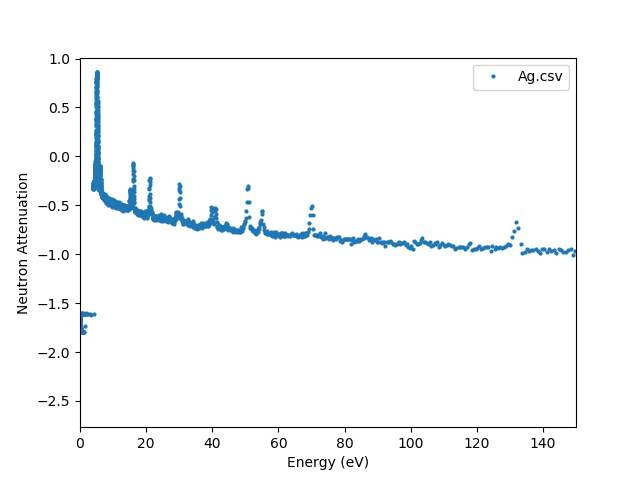

In [15]:
exp1.plot_raw(source_to_detector_m=source_to_detector_m, offset_us=offset_us)

<IPython.core.display.Javascript object>


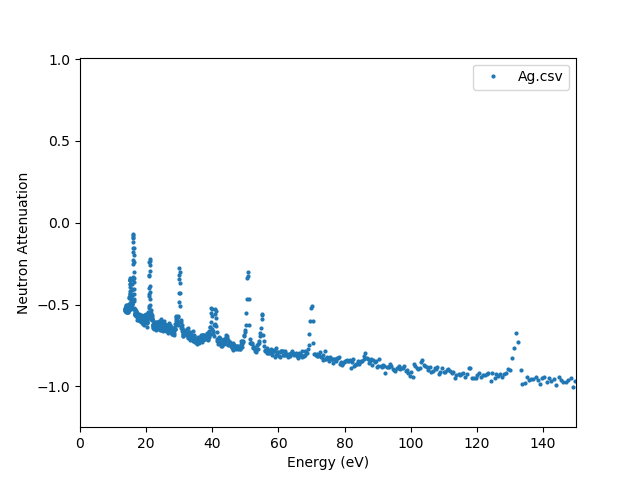

In [17]:
exp1.plot_raw(source_to_detector_m=source_to_detector_m, offset_us=offset_us)

In [ ]:
# Calibrate the peak positions
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer=layer,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          repeat=repeat,
                          folder=folder,
                          baseline=baseline)

calibration.norm_to(norm_to_file)
calibration.slice(slice_start=image_start, slice_end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
calibration.plot(before=before)


# Fit the peak height
fit = FitResonance(folder=folder,
                   spectra_file=spectra_file,
                   data_file=data_file,
                   repeat=repeat,
                   energy_min=energy_min,
                   energy_max=energy_max,
                   energy_step=energy_step,
                   calibrated_offset_us=calibration.calibrated_offset_us,
                   calibrated_source_to_detector_m=calibration.calibrated_source_to_detector_m,
                   norm_to_file=norm_to_file,
                   slice_start=image_start,
                   slice_end=image_end,
                   baseline=baseline)
fit_result = fit.fit(layer, vary='thickness', each_step=each_step)
fit.molar_conc()
fit.plot()